In [35]:
import pandas as pd
from pydataset import data

import prepare
import acquire

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

In [2]:
#Get titanic data
df = acquire.get_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
#Clean the data
new_df = prepare.prep_titanic(df)
new_df.drop(columns = ['sex','embark_town','class'], inplace =True)

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   sibsp                    891 non-null    int64  
 2   parch                    891 non-null    int64  
 3   fare                     891 non-null    float64
 4   alone                    891 non-null    int64  
 5   sex_male                 891 non-null    uint8  
 6   embark_town_Queenstown   891 non-null    uint8  
 7   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 44.4 KB


In [6]:
train, validate, test = prepare.titanic_split_data(new_df)

In [7]:
train.shape, validate.shape, test.shape

((498, 8), (214, 8), (179, 8))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   sibsp                    498 non-null    int64  
 2   parch                    498 non-null    int64  
 3   fare                     498 non-null    float64
 4   alone                    498 non-null    int64  
 5   sex_male                 498 non-null    uint8  
 6   embark_town_Queenstown   498 non-null    uint8  
 7   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 24.8 KB


### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [9]:
#Set x and y for train
x_train = train.drop(columns='survived')
y_train = train[['survived']]

In [10]:
#Do the same for validate
#Set x and y for train
x_validate = validate.drop(columns='survived')
y_validate = validate[['survived']]

In [11]:
#1 is for those who survived and 0 is for those didnt survived
#we predict those survived
train['baseline_pred'] = train.survived.max()
accuracy_score(train.survived, train.baseline_pred)

0.38353413654618473

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [12]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
print(f'Training score: {model.score(x_train, y_train): .2%}')
print(f'Validate score: {model.score(x_validate, y_validate): .2%}')

Training score:  94.58%
Validate score:  75.23%


In [14]:
train['model'] = model.predict(x_train)
train.head()

,survived,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_pred,model
583,0,0,0,40.1250,1,1,0,0,1,0
165,1,0,2,20.5250,0,1,0,1,1,1
50,0,4,1,39.6875,0,1,0,1,1,0
259,1,0,1,26.0000,0,0,0,1,1,1
306,1,0,0,110.8833,1,0,0,0,1,1


In [15]:
y_pred = model.predict(x_train)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [16]:
model.score(x_validate,y_validate)

0.7523364485981309

In [22]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index = ['Not Survive','Survive'], columns=['Pred Not','Pred Survived'])

,Pred Not,Pred Survived
Not Survive,305,2
Survive,25,166


In [29]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.924242,0.993485,0.957614,307.000000
1,0.988095,0.869110,0.924791,191.000000
accuracy,0.945783,0.945783,0.945783,0.945783
macro avg,0.956169,0.931298,0.941202,498.000000
weighted avg,0.948732,0.945783,0.945025,498.000000


Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [32]:
precision_score(y_train, y_pred)

0.9880952380952381

In [33]:
accuracy_score(y_train, y_pred)

0.9457831325301205

In [34]:
recall_score(y_train, y_pred)

0.8691099476439791

In [36]:
f1_score(y_train, y_pred)

0.9247910863509748

Run through steps 2-4 using a different max_depth value.

[Text(167.4, 181.2, 'X[4] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(83.7, 108.72, 'X[0] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(41.85, 36.23999999999998, 'gini = 0.32\nsamples = 165\nvalue = [33, 132]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]'),
 Text(209.25, 36.23999999999998, 'gini = 0.184\nsamples = 205\nvalue = [184, 21]'),
 Text(292.95, 36.23999999999998, 'gini = 0.43\nsamples = 118\nvalue = [81, 37]')]

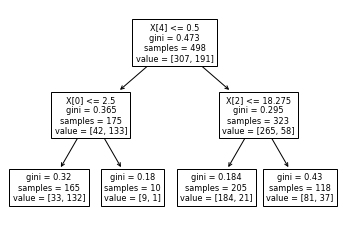

In [40]:
model2 = DecisionTreeClassifier(max_depth = 2)
model2.fit(x_train, y_train)
plot_tree(model2)

Which model performs better on your in-sample data?

In [43]:
model2.score(x_train, y_train)

0.8152610441767069

In [44]:
model2.score(x_validate, y_validate)

0.7663551401869159

In [46]:
train['model2'] = model2.predict(x_train)
train.head()

,survived,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_pred,model,model2
583,0,0,0,40.1250,1,1,0,0,1,0,0
165,1,0,2,20.5250,0,1,0,1,1,1,0
50,0,4,1,39.6875,0,1,0,1,1,0,0
259,1,0,1,26.0000,0,0,0,1,1,1,1
306,1,0,0,110.8833,1,0,0,0,1,1,1


In [47]:
y_pred_2 = model2.predict(x_train)

In [48]:
pd.DataFrame(confusion_matrix(y_train, y_pred_2), index = ['Not Survive','Survive'], columns=['Pred Not','Pred Survived'])

,Pred Not,Pred Survived
Not Survive,274,33
Survive,59,132


In [49]:
pd.DataFrame(classification_report(y_train, y_pred_2, output_dict=True)).T

,precision,recall,f1-score,support
0,0.822823,0.892508,0.856250,307.000000
1,0.800000,0.691099,0.741573,191.000000
accuracy,0.815261,0.815261,0.815261,0.815261
macro avg,0.811411,0.791804,0.798912,498.000000
weighted avg,0.814069,0.815261,0.812267,498.000000


Which model performs best on your out-of-sample data, the validate set?